<a href="https://colab.research.google.com/github/pujithaguntupalli/Machine-Learning/blob/main/linear_regression_performance_analysis(sdc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

features names:
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

 dataset sample:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

 target sample:
 0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

 dataset display:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044

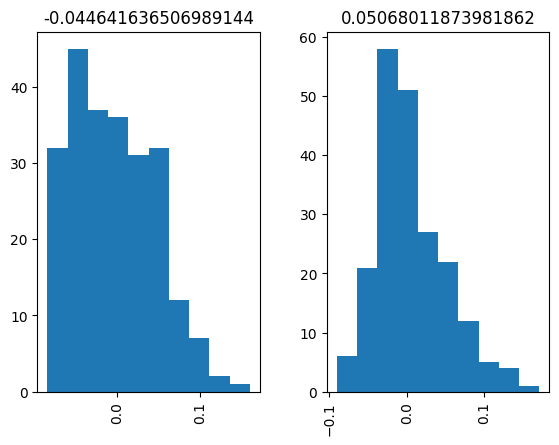

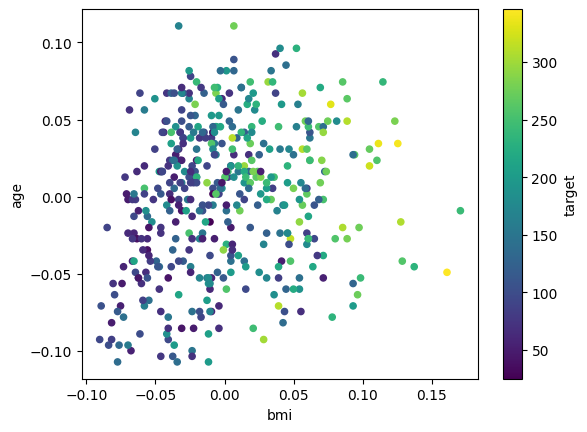

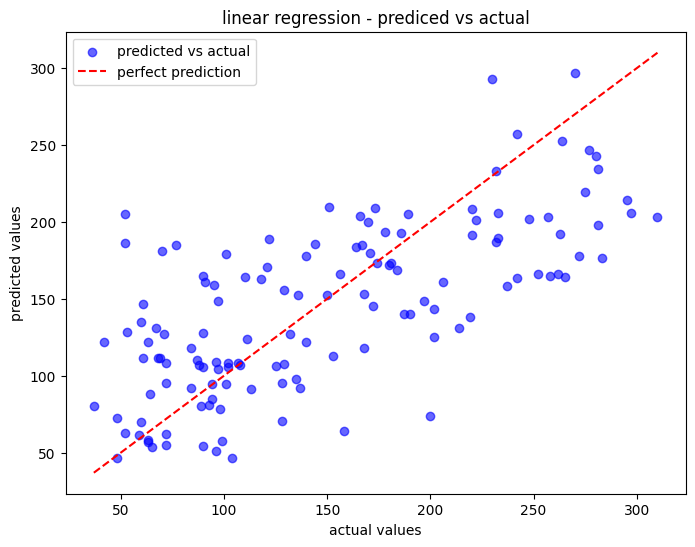

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)

#load the diabetes dataset
data=load_diabetes(as_frame=True)
x=data.data #features
y=data.target #target variable

#display dataset information -EDA
print("features names:\n",data.feature_names)
print("\n dataset sample:\n",x.head())
print("\n target sample:\n",y.head())

all_variables=pd.concat([x,y],axis=1)
print("\n dataset display:\n",all_variables.head())
print("\n dataset describe:\n",all_variables.describe())
all_variables.hist(column='bmi',by='sex')
all_variables.plot.scatter(x='bmi',y='age',c="target")

#model training by selective features only
#x=x[['age','bmi']]
#print("\n datset sample:\n",x.head())

#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#intialtize the linear regression model
model=LinearRegression()

#train the model
model.fit(x_train,y_train)

#predict on the test set
y_pred=model.predict(x_test)

#evaluate performance metrics
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("\n performance metrics:")
print(f"mean squared error(mse):{mse:.2f}")
print(f"mean absolute error(mae):{mae:.2f}")
print(f"r2 score:{r2:.2f}")

#disply model coeeficents
coefficients=pd.DataFrame({
    "feature":x.columns,
    "coefficient":model.coef_
})
print("\n model coeeficients:\n",coefficients)
print(f"\nintercept:{model.intercept_:.2f}" )

#visualization of predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color="blue",alpha=0.6,label="predicted vs actual")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',label='perfect prediction')
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("linear regression - prediced vs actual")
plt.legend()
plt.show()

In [ ]:
#reisdual